In [12]:
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# start = datetime.datetime.now() - datetime.timedelta(7)
# end = datetime.datetime.now()

# start = '2020-01-01'
# end = datetime.datetime.now()

df = yf.download('SPY, NVDA, AMD')
df

[*********************100%***********************]  3 of 3 completed


Price            Close                                High              \
Ticker             AMD        NVDA         SPY         AMD        NVDA   
Date                                                                     
1980-03-17    3.145833         NaN         NaN    3.302083         NaN   
1980-03-18    3.031250         NaN         NaN    3.125000         NaN   
1980-03-19    3.041667         NaN         NaN    3.083333         NaN   
1980-03-20    3.010417         NaN         NaN    3.062500         NaN   
1980-03-21    2.916667         NaN         NaN    3.020833         NaN   
...                ...         ...         ...         ...         ...   
2024-12-16  126.690002  132.000000  604.754578  127.760002  134.399994   
2024-12-17  125.019997  130.389999  602.262939  127.080002  131.589996   
2024-12-18  121.410004  128.910004  584.313416  127.750000  136.699997   
2024-12-19  118.879997  130.679993  584.133972  123.379997  134.029999   
2024-12-20  119.209999  134.699997  591.150024  121.860001  135.279999   

Price                          Low                                Open  \
Ticker             SPY         AMD        NVDA         SPY         AMD   
Date                                                                     
1980-03-17         NaN    3.125000         NaN         NaN    0.000000   
1980-03-18         NaN    2.937500         NaN         NaN    0.000000   
1980-03-19         NaN    3.020833         NaN         NaN    0.000000   
1980-03-20         NaN    3.010417         NaN         NaN    0.000000   
1980-03-21         NaN    2.906250         NaN         NaN    0.000000   
...                ...         ...         ...         ...         ...   
2024-12-16  605.741308  123.120003  130.419998  603.179921  126.010002   
2024-12-17  603.139992  123.150002  126.860001  600.867672  124.449997   
2024-12-18  604.375836  120.430000  128.279999  583.924709  125.430000   
2024-12-19  591.010851  118.449997  129.550003  583.884811  122.160004   
2024-12-20  595.750000  117.900002  128.220001  580.909973  118.000000   

Price                                 Volume                            
Ticker            NVDA         SPY       AMD         NVDA          SPY  
Date                                                                    
1980-03-17         NaN         NaN    219600          NaN          NaN  
1980-03-18         NaN         NaN    727200          NaN          NaN  
1980-03-19         NaN         NaN    295200          NaN          NaN  
1980-03-20         NaN         NaN    159600          NaN          NaN  
1980-03-21         NaN         NaN    130800          NaN          NaN  
...                ...         ...       ...          ...          ...  
2024-12-16  134.179993  603.967249  42090300  237951100.0   43695200.0  
2024-12-17  129.089996  602.163299  43314900  259410300.0   55773500.0  
2024-12-18  133.860001  601.953994  49724400  277444500.0  108248700.0  
2024-12-19  131.759995  589.376338  46160700  209719200.0   85919500.0  
2024-12-20  129.809998  581.770020  53366800  305207400.0  125535900.0  

[11287 rows x 15 columns]

<Axes: xlabel='Date'>

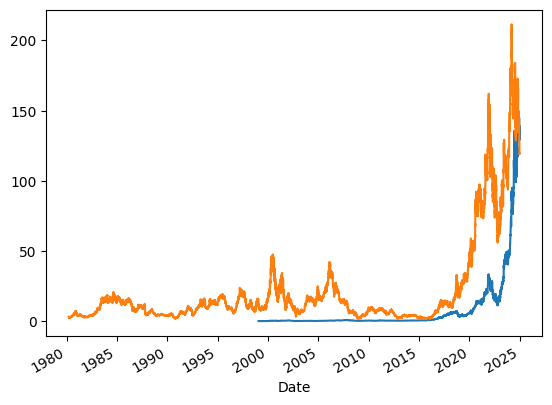

In [3]:
df['Close']['NVDA'].plot()
df['Close']['AMD'].plot()


<Axes: xlabel='Date'>

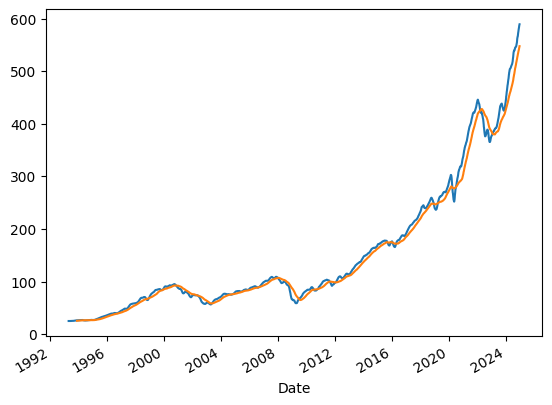

In [4]:
spy = df['Close']['SPY']
# spy.plot()

ma1 = spy.rolling(50).mean()
ma2 = spy.rolling(200).mean()
ma1.plot()
ma2.plot()

In [15]:
entry = None
pnl = None
pnls = []
dates = []

for i in range(len(spy)):
    if (ma1.iloc[i] - ma2.iloc[i]) > 0 and (ma1.iloc[i-1] - ma2.iloc[i-1]) < 0:
        if entry:
            # calculate pnl for previous short
            pnl = entry - spy.iloc[i]
            pnls.append(pnl)
            dates.append(spy.index[i])
        entry = spy.iloc[i] 
        print("entery long", pnl)

    elif (ma1.iloc[i] - ma2.iloc[i]) < 0 and (ma1.iloc[i-1] - ma2.iloc[i-1]) > 0:
        if entry:
            # calculate pnl for previous long
            pnl = spy.iloc[i] - entry
            pnls.append(pnl)
            dates.append(spy.index[i])

        entry = spy.iloc[i] 
        
        print("enter short", pnl)

enter short None
entery long -1.565591812133789
enter short 34.582191467285156
entery long -12.29440689086914
enter short 17.230804443359375
entery long 17.785552978515625
enter short -1.29522705078125
entery long 9.422080993652344
enter short 12.230995178222656
entery long -1.5260086059570312
enter short 12.327033996582031
entery long -2.7608261108398438
enter short 14.746315002441406
entery long 37.80579376220703
enter short 12.354248046875
entery long -9.5279541015625
enter short 2.6955108642578125
entery long -10.514793395996094
enter short 61.827659606933594
entery long -9.207244873046875
enter short -13.9901123046875
entery long -20.042648315429688
enter short 59.05027770996094
entery long -16.777938842773438
enter short -16.5447998046875
entery long -56.60284423828125
enter short 119.92599487304688
entery long 23.259246826171875


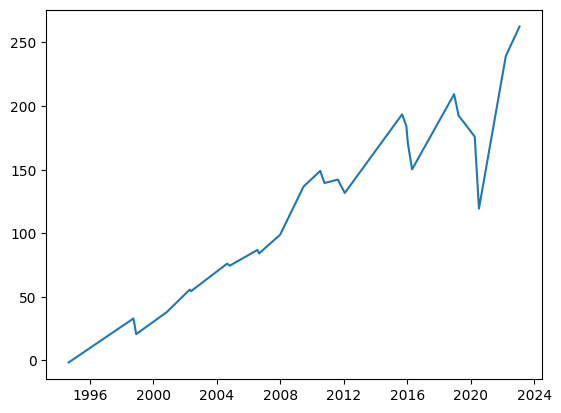

In [18]:
plt.plot(dates, np.cumsum(pnls))

# Percentage PNL

Percentage is important because just using cash pnl does not account for the current price of stock

In [19]:
entry = None
pnl = None
pnls = []
dates = []

for i in range(len(spy)):
    if (ma1.iloc[i] - ma2.iloc[i]) > 0 and (ma1.iloc[i-1] - ma2.iloc[i-1]) < 0:
        if entry:
            # calculate pnl for previous short
            pnl = (entry - spy.iloc[i])/entry  # normalize with entry to get the percentage change
            pnls.append(pnl)
            dates.append(spy.index[i])
        entry = spy.iloc[i] 
        print("entery long", pnl)

    elif (ma1.iloc[i] - ma2.iloc[i]) < 0 and (ma1.iloc[i-1] - ma2.iloc[i-1]) > 0:
        if entry:
            # calculate pnl for previous long
            pnl = (spy.iloc[i] - entry) / entry # normalize with entry to get percentage change
            pnls.append(pnl)
            dates.append(spy.index[i])

        entry = spy.iloc[i] 
        
        print("enter short", pnl)

enter short None
entery long -0.06032502805064086
enter short 1.2567025302163333
entery long -0.1979763189263384
enter short 0.2316130272816074
entery long 0.19411117035099815
enter short -0.017540982912089574
entery long 0.12987944065342988
enter short 0.1937652714215681
entery long -0.020251266482497053
enter short 0.16034176386866364
entery long -0.03094861317641694
enter short 0.16034249133385398
entery long 0.35427237188954164
enter short 0.1792857913140564
entery long -0.1172492696143222
enter short 0.02968940518837284
entery long -0.11247471717182268
enter short 0.5944931072141282
entery long -0.055522762219832066
enter short -0.07992726783911157
entery long -0.1244533848991778
enter short 0.3260859563719878
entery long -0.06986780221540533
enter short -0.06439762845107988
entery long -0.23548068918489484
enter short 0.403826125201734
entery long 0.05579090534434181


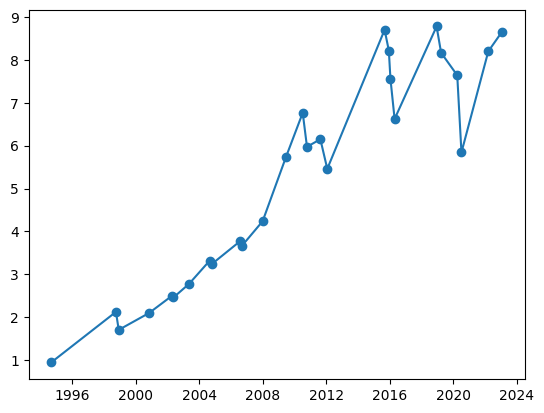

In [25]:
# to plot in case of percentage we need to cummulatively multiply instead of cummulative sum
# but we cannot just do cum product because percentages are small and  we get really small values so we add 1 to show percentage increase in value from entry reference of 1
plt.plot(dates, np.cumprod([1+x for x in pnls]), '-o')

- Looking at the pnl curve is not enough, because it does not tell us about the risks involved with the strategy.
- So we need to look in detail and analyze whats happening to equity during trade
- A good measure is sharpe ratio.
- sharpe ratio is ratio of pnl with risk of strategy
- The above graph is realized pnl
- need to also pay attention to unrealized pnl


In [ ]:
entry = None
pnl = None
pnls = []
dates = []
unrlzd = []
unrlzd_dates = []
inpos = 0
for i in range(len(spy)):
    unr = ((spy.iloc[i] - spy.iloc[i-1])/spy.iloc[i-1]) * inpos  # calculate unrealized position
    unrlzd.append(unr)
    unrlzd_dates.append(spy.index[i])
    if (ma1.iloc[i] - ma2.iloc[i]) > 0 and (ma1.iloc[i-1] - ma2.iloc[i-1]) < 0:
        if entry:
            # calculate pnl for previous short
            pnl = (entry - spy.iloc[i])/entry  # normalize with entry to get the percentage change
            pnls.append(pnl)
            dates.append(spy.index[i])
        entry = spy.iloc[i] 
        inpos = 1
        print("entery long", pnl)

    elif (ma1.iloc[i] - ma2.iloc[i]) < 0 and (ma1.iloc[i-1] - ma2.iloc[i-1]) > 0:
        if entry:
            # calculate pnl for previous long
            pnl = (spy.iloc[i] - entry) / entry # normalize with entry to get percentage change
            pnls.append(pnl)
            dates.append(spy.index[i])

        entry = spy.iloc[i] 
        inpos = -1
        print("enter short", pnl)

enter short None
entery long -0.06032502805064086
enter short 1.2567025302163333
entery long -0.1979763189263384
enter short 0.2316130272816074
entery long 0.19411117035099815
enter short -0.017540982912089574
entery long 0.12987944065342988
enter short 0.1937652714215681
entery long -0.020251266482497053
enter short 0.16034176386866364
entery long -0.03094861317641694
enter short 0.16034249133385398
entery long 0.35427237188954164
enter short 0.1792857913140564
entery long -0.1172492696143222
enter short 0.02968940518837284
entery long -0.11247471717182268
enter short 0.5944931072141282
entery long -0.055522762219832066
enter short -0.07992726783911157
entery long -0.1244533848991778
enter short 0.3260859563719878
entery long -0.06986780221540533
enter short -0.06439762845107988
entery long -0.23548068918489484
enter short 0.403826125201734
entery long 0.05579090534434181


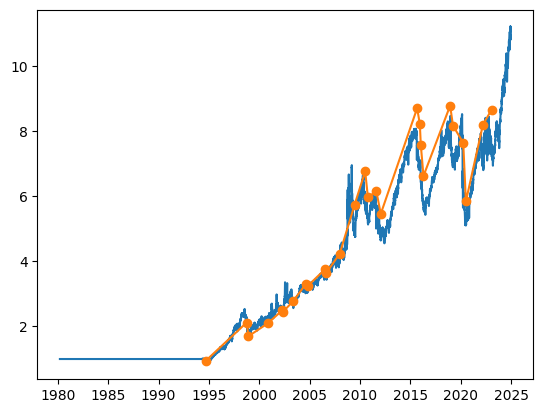

In [53]:
# unrealized pnl
plt.plot(unrlzd_dates, np.nancumprod([1+ x for x in unrlzd]))
plt.plot(dates, np.cumprod([1+x for x in pnls]), '-o')